<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مطالعه بازار‌های هدف
</font>
</h1>

   
<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    کتابخانه‌ها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
       ابتدا کتاب‌خانه‌های مورد نیاز خود را اضافه کنید.    
</font>
</p>

In [181]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
    خواندن مجموعه داده
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
    فایل پیش‌پردازش‌شده را بخوانید.
</font>
</p>

In [182]:
# read the preprocessed dataset
df = pd.read_csv("../1_preprocessing/preprocessed_sales.csv")


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
رسم نمودار پراکندگی میزان فروش و تعداد مشتریان کشورها
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت بر روی یک نمودار پراکندگی، کشورهای مختلف را نمایش می‌دهید تا میزان فروش و تعداد مشتریان آنها را ببینیم. همانطور که در پایین مشخص شده‌است، کشور‌ها با توجه به میزان فروش و تعداد مشتریان به ۴ گروه تقسیم می‌شوند.
<br>
با استفاده از چارک‌ سوم هر دو معیار، شما با ۴ گروه از کشورها روبه‌رو می‌شوید.
<br>
اگر میزان فروش را را SA و چارک سومش را به qSA، تعداد مشتری‌ها را CC و چارک سومش را با qCC نشان دهیم، ۴ گروه از کشورها به شکل زیر تعریف می‌شوند.
</font>
</p>

<div dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
    <font>
        <ol>
            <li>
                کشور‌هایی که در آن‌ها SA < qSA و CC < qCC
            </li>
            <li>
               کشور‌هایی که در آن‌ها SA < qSA و CC > qCC
            </li>
            <li>
               کشور‌هایی که در آن‌ها SA > qSA و CC < qCC
            </li>
            <li>
               کشور‌هایی که در آن‌ها SA > qSA و CC > qCC
            </li>
        </ol>
  </font>
</div>

<br>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
برای رسم نمودار باید مراحل زیر را طی کنید:

<ul dir =rtl>
  <li>
ابتدا سفارشات مربوط به United Kingdom را حذف کنید
</li>

  <li>
به ازای هر کشور، تعداد مشتری و میزان فروش را محاسبه کنید.</li>

  <li>
چارک سوم را برای میزان فروش و تعداد مشتری به دست آورید.</li>

  <li>
با استفاده از توضیحات بالا، کشورها را به چهار گروه تقسیم کنید.
</li>
  <li>
در ادامه، با استفاده از اطلاعاتی که به دست آورده‌اید، نمودار زیر را رسم کنید.
</li>
</ul>

</font>
</p>

<p style="text-align:center;"><img src="output.png"></p>

In [186]:
df = df[df["Country"] != "United Kingdom"]
customer_num = df.drop_duplicates(subset="CustomerId").groupby("Country")["CustomerId"].count()
df["WholePrice"] = df["Quantity"] * df["UnitPrice"]
revenue = df.groupby("Country")["WholePrice"].sum()
revenue = revenue.reset_index()
customer_num = customer_num.reset_index()
new_df = pd.merge(customer_num, revenue)
new_df.columns = ["Country", "CC", "SA"]

In [187]:
qSA = new_df["SA"].quantile(0.75)
qCC = new_df["CC"].quantile(0.75)

In [188]:
conditions = [((qSA > new_df["SA"]) & (qCC > new_df["CC"])),((qSA > new_df["SA"]) & (qCC < new_df["CC"])),((qSA < new_df["SA"]) & (qCC > new_df["CC"])),((qSA < new_df["SA"]) & (qCC < new_df["CC"]))]
choices = ["cyan", "blue", "green", "red"]
new_df["color"] = np.select(conditions, choices)
colors = {"cyan":"cyan", "blue":"blue", "green":"green", "red":"red"}

In [214]:
kir=new_df.loc[new_df['Country'] == "Spain", 'SA'].item()
kir

47568.65

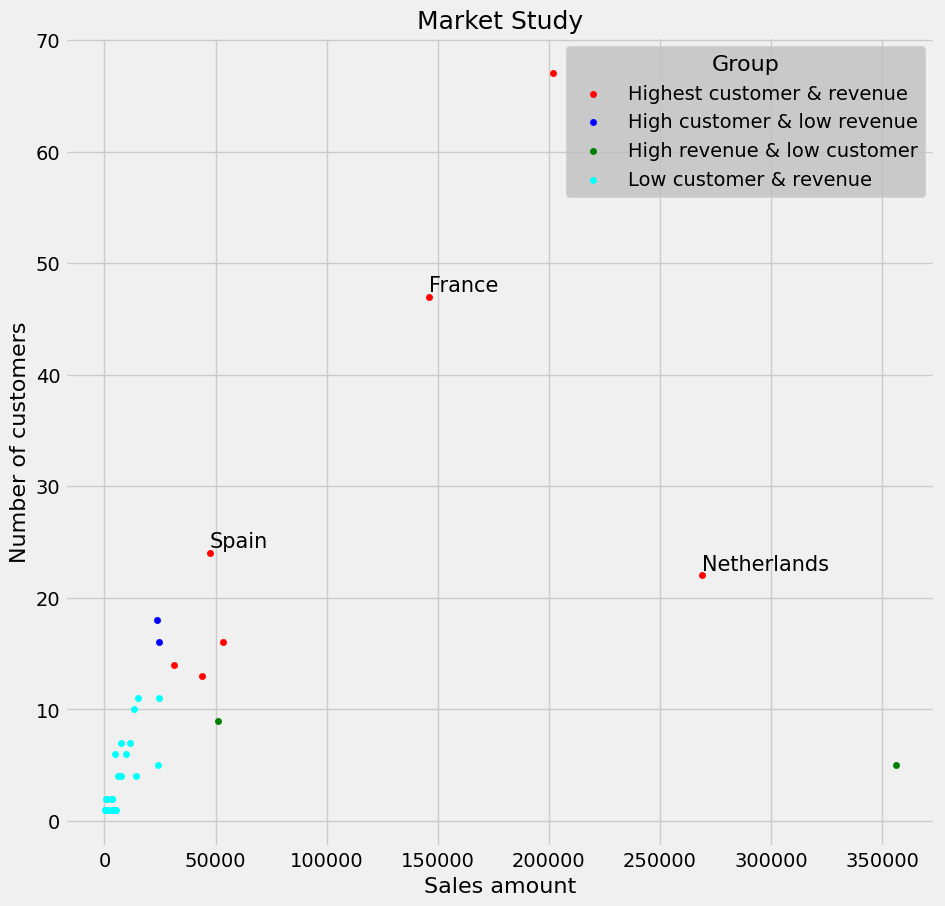

In [215]:
# plot

fig , ax = plt.subplots(figsize=(10, 10))
plt.style.use("fivethirtyeight")

ax.scatter( x="SA", y="CC", data=new_df[new_df["color"]=="red"], c="red", s=20)
ax.scatter( x="SA", y="CC", data=new_df[new_df["color"]=="blue"], c="blue", s=20)
ax.scatter( x="SA", y="CC", data=new_df[new_df["color"]=="green"], c="green", s=20)
ax.scatter( x="SA", y="CC", data=new_df[new_df["color"]=="cyan"], c="cyan", s=20)

ax.set_xlabel("Sales amount", fontsize=16)
ax.set_ylabel("Number of customers", fontsize=16)
ax.set_title("Market Study", fontsize=18)
ax.legend(["Highest customer & revenue", "High customer & low revenue","High revenue & low customer", "Low customer & revenue"]
                ,title="Group", frameon=True, fontsize=14, title_fontsize=16, facecolor="silver")

ax.text(new_df.loc[new_df['Country'] == "Spain", 'SA'].item() ,new_df.loc[new_df['Country'] == "Spain", 'CC'].item() + 0.5,"Spain", fontsize=15);
ax.text(new_df.loc[new_df['Country'] == "France", 'SA'].item() ,new_df.loc[new_df['Country'] == "France", 'CC'].item() + 0.5,"France", fontsize=15);
ax.text(new_df.loc[new_df['Country'] == "Netherlands", 'SA'].item() ,new_df.loc[new_df['Country'] == "Netherlands", 'CC'].item() + 0.5,"Netherlands", fontsize=15);




<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ویژگی‌های نمودار
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>ویژگی</th>
<th><font face="vazir" size=3>مقدار</th>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه شکل</td>
<td><font face="vazir" size=3>۱۰ در ۱۰ اینچ</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ کشورهای گروه اول</td>
<td><font face="vazir" size=3>red</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ کشورهای گروه دوم</td>
<td><font face="vazir" size=3>blue</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ کشورهای گروه سوم</td>
<td><font face="vazir" size=3>green</td>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ کشورهای گروه چهارم</td>
<td><font face="vazir" size=3>cyan</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت عنوان صفحه‌محور</td>
<td><font face="vazir" size=3>۱۸</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت محور افقی و عمودی</td>
<td><font face="vazir" size=3>۱۶</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه نقاط</td>
<td><font face="vazir" size=3>۲۰</td>
</tr>

<tr>
<td><font face="vazir" size=3>استایل</td>
<td><font face="vazir" size=3>fivethirtyeight</td>
</tr>

</table>
</p>

<h2 dir = rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
نکات مربوط به <code>legend</code>
</font>
</h2>
<p dir=rtl align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
<code>legend</code> این نمودار کمی با نمونه‌هایی که پیش از این دیدید فرق دارد. در اینجا، <code>legend</code> استفاده شده دارای عنوان و قاب می‌باشد. عنوان <code>legend</code> با استفاده از پارامتر  <code>title</code> انتخاب می‌شود. با <code>True</code> کردن پارامتر <code>frameon</code> قاب برای <code>legend</code> نمایش داده می‌شود.
<br>
برای تغییر اندازه فونت عنوان و رنگ زمینه قاب، از پارامترهای <code>title_fontsize</code> و <code>facecolor</code> استفاده کنید.
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" color="#0099cc">
ویژگی‌های <code>legend</code>
</font>
</p>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<table dir=rtl align = center>

<tr>
<th><font face="vazir" size=3>ویژگی</th>
<th><font face="vazir" size=3>مقدار</th>
</tr>

<tr>
<td><font face="vazir" size=3>رنگ زمینه قاب</td>
<td><font face="vazir" size=3>silver</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت عنوان</td>
<td><font face="vazir" size=3>۱۶</td>
</tr>

<tr>
<td><font face="vazir" size=3>اندازه فونت متون</td>
<td><font face="vazir" size=3>۱۴</td>
</tr>

</table>
</p>

<p dir=rtl align=right style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در انتها،‌ کشورهای فرانسه، اسپانیا و هلند را روی نقشه نمایش دهید. یعنی،‌ نام آنها را روی نقاطی که این کشورها را نشان می‌دهند، رسم کنید. موقعیت متون، همان موقعیت نقاط کشورها می‌باشد با این تفاوت که در محور عمودی، موقعیت متن‌ها نیم واحد افزایش یافته است. اندازه فونت این متن‌ها، ۱۵ می‌باشد.

</font>
</p>

In [216]:
# prepare the dataframe


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
سلول جواب‌ساز    
</font>
</h2>


In [217]:

import zipfile
import joblib

joblib.dump(fig,"fig")


def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)

file_names = ["fig", "3_market_study.ipynb"]
compress(file_names)

File Paths:
['fig', '3_market_study.ipynb']
